In [1]:
%pylab inline
from clawpack.pyclaw import Solution
import os
import pygmt
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy

Populating the interactive namespace from numpy and matplotlib


In [124]:
def read_fortq(frame):
    """
    Import fort.q files to get x,y,z data
    """
    fortq = Solution(frame, file_format='ascii')
    patch_dict = {}
    for stateno, state in enumerate(fortq.states):
        patch = state.patch
        level = patch.level
        Xc, Yc = state.grid.c_centers
        new_Xc = linspace(patch.dimensions[0].lower,patch.dimensions[0].upper,len(Xc[:,0]))
        new_Yc = linspace(patch.dimensions[1].lower,patch.dimensions[1].upper,len(Yc[0,:]))
        h = state.q[0,:,:]
        eta = state.q[3,:,:]
        drytol_default = 0.00
        water = np.copy(eta)
        idx = np.where((h<=drytol_default) & (h>=-drytol_default))
        water[idx] = np.nan
#         idx2 = np.where(eta==0)
#         water[idx2] = np.nan
        
        # Save variables to dictionary
        long=new_Xc
        lat = new_Yc
        patch_dict[stateno] = {"lat": lat, 'long':long, 'eta':eta, 'amr_level':level, 'Xc':new_Xc, 'Yc':new_Yc, 'water':water}
    return patch_dict, water, h, new_Xc, new_Yc, eta

test1 dict_keys(['lat', 'long', 'eta', 'amr_level', 'Xc', 'Yc', 'water'])


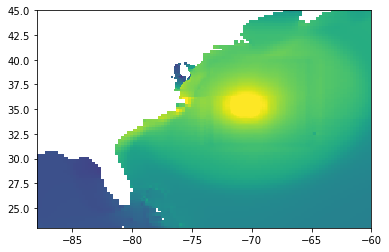

In [125]:
# def gmt_map(lat, lon, water):
bathy = './bathy/entire_world_srtm30.grd'
[patch_dict, water, h, X, Y, eta]=read_fortq(15)
#fig = pygmt.Figure()
#fig.basemap(region=[-90.0, -60.00, 24., 45.], projection='M8i',frame='a')
# extent1 =  [-90, -60, 24,45]
# projections = [ccrs.PlateCarree(-90)]
# titles = ['Equirectangular projection']

# fig = figure(figsize=(15,13))
# tight_layout()
# gs = gridspec.GridSpec(2, 2,wspace=0.0,hspace=0.01)
# ax1.set_extent(extents=extent1, crs=ccrs.Geodetic())
# ax1 = subplot(gs[0,0],projection=ccrs.PlateCarree(-90))
#pygmt.makecpt(series=[-500, 500], cmap='jet')
#fig.grdimage(bathy,region=[-90.0, -60.00, 24., 45.] )
#pygmt.makecpt(series=[-0.1, 1], cmap='polar')
# x = X[:,0]
# y = Y[0]
# df = pd.DataFrame(data=water, index=[i for i in x], columns=[j for j in y])
# df.index.name='Longitude'
# df.columns.name="Latitude"
# da=xr.DataArray(data=df.T)
# extent1 =  [-90, -60, 20,45]
# projections = [ccrs.PlateCarree(-90)]
# titles = ['Equirectangular projection']

# fig = figure(figsize=(15,13))
# tight_layout()
# gs = gridspec.GridSpec(1, 1,wspace=0.0,hspace=0.01)
# ax1.set_extent(extents=extent1, crs=ccrs.Geodetic())
# ax1 = subplot(gs[0,0],projection=ccrs.PlateCarree(-90))
amr_level_old = 1
m=-1

# find number of patches per 


for patch in patch_dict:
    m+=1
    amr_level = patch_dict[patch]['amr_level']
    if amr_level >=1 and amr_level<=3:
#         lat = patch_dict[patch]['Yc']
#      #   lat=lat_d[0,:]
#      #   print(lat)
#      #   print(long)
#         long = patch_dict[patch]['Xc']
      #  long=long_d[:,0]
        #print(long[:,0])
        lat = patch_dict[patch]['lat']
      #  dy = abs(lat[1]-lat[0])
        #lat = lat +dy
        long = patch_dict[patch]['long']
#         dx = abs(long[1]-long[0])
#         long = long -dx
      #  print(long)
        water = patch_dict[patch]['water']
#        print('lat',shape(lat))
 #       print('long',shape(long))
 #       print(shape(water))
        pcolor(long,lat,water.T,vmin=0.0,vmax=1.0)

  #      print(amr_level)
        if amr_level_old != amr_level:
            amr_level_old = amr_level
        if amr_level_old == amr_level:
            av_x = 0.5*(long[0]+long[-1])
            av_y = 0.5*(lat[0]+lat[-1])
#        print(min(long),max(long))
#        print(min(lat),max(lat))

#        print('test',amr_level,amr_level_old)
    #         print(patch, lat.min(), lat.max(), long.min(),long.max, eta.min(), eta.max())
    #         df = pd.DataFrame(data=water, index=[i for i in long], columns=[i for i in lat])# 'Latitude':lat, 'Longitude':long})
    #         x = df.index.values
    #         y = df.columns.values
    #         z = df.values
    #         z=array(z)
    #       #  print(x)
    #         z[z>=0.0] = 0.0
    #         print(z.max)
    #         pcolor(x,y,z.T,vmin=0.0,vmax=3.0)
#         scatter(av_x,av_y,s=1000)
#         text(av_x,av_y,str(m)+'/'+str(amr_level))
#         df.index.name='Longitude'
#         df.columns.name="Latitude"
#         da=xr.DataArray(data=df.T)
#         print(m)
#        da.plot.pcolormesh(add_colorbar=False)
#        pcolor(x,y,da)
# colorbar()
# #fig.show()
# ### Plot GMT map
print('test1', patch_dict[0].keys())

# # gmt_map(X, Y, water)
# print(x[0]-x[1])

In [112]:
### Test plot of the data
### Seeing only the finest patch, not the largest which is why no details show up
# for i in range(4,5):
#     [patch_dict, water, h, X, Y, eta]=read_fortq(i)
#     plt.figure()
#     plt.scatter(X,Y,c=water,s=100,cmap=plt.get_cmap('coolwarm'))
#     plt.clim(-0.1,0.10)
#     plt.colorbar()
#     plt.show()

In [79]:
# plt.figure()
# for key in patch_dict:
#     X = patch_dict[key]['Xc']
#     Y = patch_dict[key]['Yc']
#     water = patch_dict[key]['water']
    
#     plt.scatter(X,Y,c=water, s=100, cmap=plt.get_cmap('coolwarm'))
# plt.clim(-1.0, 1.0)
# plt.colorbar()
# plt.show()

In [80]:
# import matplotlib.pyplot as plt
# import matplotlib.gridspec as gridspec
# import cartopy.crs as ccrs
# from cartopy.feature import OCEAN
# import cartopy.io.img_tiles as cimgt
# from cartopy.io.img_tiles import StamenTerrain
# import cartopy.io.img_tiles as cimgt
# stamen_terrain = cimgt.StamenTerrain()#'terrain-background')
# #warnings.filterwarnings('ignore')

# extent1 =  [-90, -60, 20,45]
# projections = [ccrs.PlateCarree(-90)]
# titles = ['Equirectangular projection']

# fig = figure(figsize=(15,13))
# tight_layout()
# gs = gridspec.GridSpec(1, 1,wspace=0.0,hspace=0.01)
# ax1.set_extent(extents=extent1, crs=ccrs.Geodetic())
# ax1 = subplot(gs[0,0],projection=ccrs.PlateCarree(-90))
# for key in patch_dict:
#     X = patch_dict[key]['Xc']
#     Y = patch_dict[key]['Yc']
#     water = patch_dict[key]['water']
#     ax1.scatter(X,Y,c=water, s=100, cmap=plt.get_cmap('coolwarm'),transform=ccrs.Geodetic())


In [81]:
## find neighbor

In [82]:
# # processing

# ## find number amr levels
# ## how many patches per level
# ## size of the patches in each level
# [patch_dict, water, h, X, Y, eta]=read_fortq(1)
# min_amr_l = 1
# max_amr_l = 3
# amr_l = []
# size_l = []
# num_l = []
# m=0
# amr_level_old=min_amr_l-1
# if min_amr_l == max_amr_l:
#     for patch in patch_dict:
#         amr_level = patch_dict[patch]['amr_level']
#         if amr_level== min_amr_l:
#             water = patch_dict[patch]['water']
#             m+=1
#     num_l.append(m)
#     amr_l.append(min_amr_l)
#     size_l.append(shape(water))
        


# if min_amr_l != max_amr_l:
#     print('test1')
#     for patch in patch_dict:
#         print('patch',patch_dict)
#         amr_level = patch_dict[patch]['amr_level']
        
#         if amr_level>=min_amr_l:
#             print(amr_level)
            
#             if amr_level_old == amr_level:
#                 m+=1
#             if amr_level_old != amr_level:
#                 water = patch_dict[patch]['water']
#                 print(shape(water))
#                 amr_level_old = amr_level
#                 if m!=0:
#                     num_l.append(m)
#                 amr_level_old = amr_level
#                 amr_l.append(int(amr_level))
#                 size_l.append(shape(water))
#                 m=1
#         if amr_level == max_amr_l:
#             num_l.append(m) 
#             break
# # if min_amr_l == max_amr_l:
# #     print('test2')
# #     m=0
# #     for patch in patch_dict:
# #         amr_level = patch_dict[patch]['amr_level']
# #         water = patch_dict[patch]['water']
# #         if amr_level==min_amr_l:
# #             m+=1
    
# #     amr_l.append(int(amr_level))
# #     size_l.append(shape(water))
# #     num_l.append(m) 
# print(num_l)
# print('AMR',amr_l)
# print(size_l)
# print('outside',len(num_l))

# print('innercircle')
# nx_d1 = size_l[0][0]
# ny_d1 = size_l[0][1]
# eta_d1 = zeros([num_l[0],ny_d1,nx_d1])
# x_d1 = zeros([num_l[0],nx_d1])
# y_d1 = zeros([num_l[0],ny_d1])
# print('sizes')
# print('\t eta_d1:',shape(eta_d1),amr_l)
# m=-1
# for patch in patch_dict:
#     amr_level = patch_dict[patch]['amr_level']

#     if amr_level == amr_l[0]:
#         m+=1
#         lat = patch_dict[patch]['lat']
#         long = patch_dict[patch]['long']
#         water = patch_dict[patch]['water']
#         eta_d1[m,:,:] = water.T
#         x_d1[m,:] = long[:]
#         y_d1[m,:] = lat[:]
# if len(num_l)>1:
#     nx_d2 = size_l[1][0]
#     ny_d2 = size_l[1][1]
#     eta_d2 = zeros([num_l[1],ny_d2,nx_d2])
#     x_d2 = zeros([num_l[1],nx_d2])
#     y_d2 = zeros([num_l[1],ny_d2])
#     m=-1
#     for patch in patch_dict:
#         amr_level = patch_dict[patch]['amr_level']

#         if amr_level == amr_l[1]:
#             m+=1
#             lat = patch_dict[patch]['lat']
#             long = patch_dict[patch]['long']
#             water = patch_dict[patch]['water']
#             print('n2',shape(water),amr_l[1],m)
#             eta_d2[m,:,:] = water.T
#             x_d2[m,:] = long[:]
#             y_d2[m,:] = lat[:]
#     print('\t eta_d2:',shape(eta_d2),amr_l)

# elif len(num_l) > 2:    
#     nx_d3 = size_l[2][0]
#     ny_d3 = size_l[2][1]
#     eta_d3 = zeros([num_l[2],ny_d3,nx_d3])
#     x_d3 = zeros([num_l[2],nx_d3])
#     y_d3 = zeros([num_l[2],ny_d3])
#     m=-1
#     for patch in patch_dict:
#         amr_level = patch_dict[patch]['amr_level']

#         if amr_level == amr_l[2]:
#             m+=1
#             lat = patch_dict[patch]['lat']
#             long = patch_dict[patch]['long']
#             water = patch_dict[patch]['water']
#             print('n2',shape(water),amr_l[1],m)
#             eta_d3[m,:,:] = water.T
#             x_d3[m,:] = long[:]
#             y_d3[m,:] = lat[:]
#     print('\t eta_d3:',shape(eta_d3),amr_l)

# for i in range(num_l[0]):
#     pcolor(x_d1[i,:],y_d1[i,:],eta_d1[i,:,:],vmin=0,vmax=1.0)
# for i in range(num_l[1]):
#     pcolor(x_d2[i,:],y_d2[i,:],eta_d2[i,:,:],vmin=0,vmax=1.0)
# for i in range(num_l[2]):
#     pcolor(x_d3[i,:],y_d3[i,:],eta_d3[i,:,:],vmin=0,vmax=1.0)    
    

# # print('test',shape(eta_d1))
        
# # #         num_l.append(m)
# # #         m=1
# # #         print(amr_level,shape(water))
# # #num_l.append(m)        
# print(m)
# print(amr_l)
# print(size_l)
# print(num_l)


In [83]:
# for i in range(num_l[0]):
#     print(i,min(x_d1[i,:]),max(x_d1[i,:]))
#     print(i,min(y_d1[i,:]),max(y_d1[i,:]))
# na = concatenate((x_d1[3,:],x_d1[1,:]))
# nb = concatenate((y_d1[1,:],y_d1[0,:]))
# #plot(nb)
# print(shape(na))
# print(shape(nb))
# a = concatenate((eta_d1[1,:,:],eta_d1[0,:,:]),axis=0)
# b = concatenate((eta_d1[3,:,:],eta_d1[2,:,:]),axis=0)
# c = concatenate((b,a),axis=1)
# print(shape(c))
# pcolor(na,nb,c)

In [73]:
# # def gmt_map(lat, lon, water):
# bathy = './bathy/entire_world_srtm30.grd'
# [patch_dict, water, h, X, Y, eta]=read_fortq(3)
# fig = pygmt.Figure()
# fig.basemap(region=[-90.0, -60.00, 24., 45.], projection='M8i',frame='a')
# pygmt.makecpt(series=[-500, 500], cmap='jet')
# fig.grdimage(bathy,region=[-90.0, -60.00, 24., 45.] )
# pygmt.makecpt(series=[-0.1, 1], cmap='polar')
# # x = X[:,0]
# # y = Y[0]
# # df = pd.DataFrame(data=water, index=[i for i in x], columns=[j for j in y])
# # df.index.name='Longitude'
# # df.columns.name="Latitude"
# # da=xr.DataArray(data=df.T)
# for patch in patch_dict:
#     lat = patch_dict[patch]['lat']
#     long = patch_dict[patch]['long']
#     water = patch_dict[patch]['water']
#     if patch_dict[patch]['amr_level'] >= 1:
#         print(patch, lat.min(), lat.max(), long.min(),long.max, eta.min(), eta.max())
#         df = pd.DataFrame(data=water, index=[i for i in long], columns=[i for i in lat])# 'Latitude':lat, 'Longitude':long})
#         df.index.name='Longitude'
#         df.columns.name="Latitude"
#         da=xr.DataArray(data=df.T)

#         fig.grdimage(da, Q=True,t=10)
# fig.colorbar()
# fig.show()
# ### Plot GMT map


# # gmt_map(X, Y, water)
 

In [11]:
water -= .33
water

array([[0.49964594, 0.49886538, 0.49788077, 0.50536582, 0.51291023,
        0.52364276, 0.53574222, 0.54716461, 0.55547144, 0.56013894,
        0.56114027, 0.55861215, 0.55322153, 0.54532186, 0.5370585 ,
        0.53055132, 0.52656839, 0.52268331, 0.52590262, 0.52597909],
       [0.48987785, 0.47957344, 0.4739097 , 0.47615326, 0.48048309,
        0.48943174, 0.5022359 , 0.5150351 , 0.52503758, 0.530668  ,
        0.53152972, 0.52816245, 0.52131668, 0.51238921, 0.50415057,
        0.50038061, 0.49940567, 0.49957515, 0.50779516, 0.51600071],
       [0.47821341, 0.46219802, 0.45208534, 0.44943739, 0.44995562,
        0.45720568, 0.47019264, 0.48394208, 0.49466016, 0.50050683,
        0.50107551, 0.49668728, 0.4886225 , 0.4785815 , 0.4705037 ,
        0.46828244, 0.47109745, 0.47479184, 0.48712869, 0.50089599],
       [0.47931711, 0.4614746 , 0.44779007, 0.44243939, 0.44080631,
        0.4474275 , 0.46118819, 0.47643034, 0.48860058, 0.49527788,
        0.49581589, 0.49063168, 0.48127666, 0

In [ ]:
fig = plt.figure(figsize=[20,15])
ax = fig.add_subplot(121, projection=ccrs.PlateCarree([-74, -60.00, 20., 44]))
img_extent = [-90, -60.00, 25., 44]

ax.set_extent(img_extent)
ax.coastlines()
for patch in patch_dict:
    lat = patch_dict[patch]['lat']
    long = patch_dict[patch]['long']
    water = patch_dict[patch]['water']
    if patch_dict[patch]['amr_level'] >= 1:
        df = pd.DataFrame(data=water, index=[i for i in long], columns=[i for i in lat])# 'Latitude':lat, 'Longitude':long})
        df.index.name='Longitude'
        df.columns.name="Latitude"
        da=xr.DataArray(data=df.T)
        X, Y = np.meshgrid(lat, long)
        ax.contourf(X, Y, water)


# import numpy as np
# lon = np.linspace(-80, 80, 25)
# lat = np.linspace(30, 70, 25)
# lon2d, lat2d = np.meshgrid(lon, lat)
# data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)
# ax.contourf(da, alpha=0.5)
plt.show()

# fig = plt.figure(2)
# plt.pcolor(Xc, Yc, eta, vmin=-0.1, vmax=1.)

In [ ]:
ccrs.Geodetic?